# **1-Import the necessary libraries and load the dataset**

In [ ]:
from google.colab import files
import zipfile
import os
import cv2
from skimage.feature import hog, local_binary_pattern
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# A list containing the paths to the zip files‍
zip_paths =['/content/barrel_images_temp.zip','/content/lions_images_temp.zip']

# Unzipping each file in the list‍
for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/dataset")

# **2- Extract features by using HOG**

In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Paths
dataset_path = "/content/dataset"
class1_path = os.path.join(dataset_path, "/content/dataset/barrel_images_temp")
class2_path = os.path.join(dataset_path, "/content/dataset/lions_images_temp")

# Parameters for HOG
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}

# Initialize data and labels
data = []
labels = []

# Helper function to load images and extract features using HOG
def process_directory(path, label):
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        if img is not None:
            # Resize image for consistency
            img_resized = cv2.resize(img, (128, 128))
            # Extract HOG features
            features = hog(img_resized, **hog_params)
            data.append(features)
            labels.append(label)

# Process both directories
process_directory(class1_path, label=0)  # Class1 label = 0
process_directory(class2_path, label=1)  # Class2 label = 1

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)




# **3- Split dataset into traing and Testing set**

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



# **4-Train Knn model**

In [ ]:
# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust 'n_neighbors'
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

# **4- Test Knn model**

In [ ]:
# Predict on the test set
y_pred = knn.predict(X_test)



# **5- analyze the model**

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        96
           1       0.89      0.70      0.78       104

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.82      0.80      0.80       200



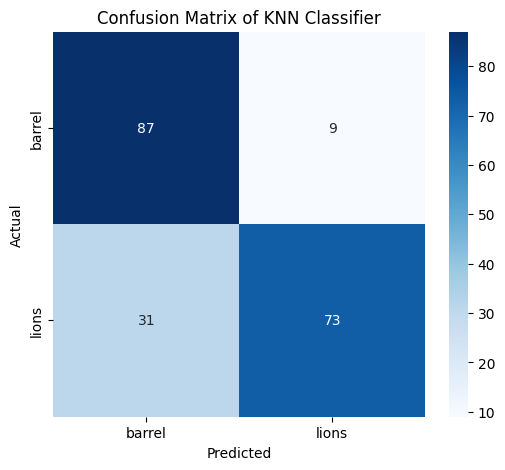

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['barrel', 'lions'], yticklabels=['barrel', 'lions'])
plt.title('Confusion Matrix of KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()